In [1]:
import os
from PIL import Image
import random

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def create_collage(width, height, path, listofimages, fn='img', cols=3, rows=2):
    thumbnail_width = width//cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    new_im = Image.new('RGB', (width, height))
    ims = []
    for p in listofimages:
        im = Image.open(path + '/' + p)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            new_im.paste(ims[i], (x, y))
            i += 1
            y += thumbnail_height
        x += thumbnail_width
        y = 0
    
    fn = fn + '.jpg'
    return new_im, fn, new_im.size

def create_mean_plot(path, origin_dataset, in_vector_sz=182):
    y            = []
    error        = []
    lbls         = []

    dt   = {}
    plts = {}

    with h5py.File(path, 'r') as f:
        dset = f['fft_data']
        orgn = f['orgn_data']
        total_imgs = len(dset)
        x = np.arange(0, in_vector_sz)

        for z in range(total_imgs):
            dataset_name = origin_dataset[orgn[z]]
            if dataset_name not in dt:
                dt[dataset_name] = [z]
            else:
                dt[dataset_name].append(z)
        for key, val in dt.items():
            arr = np.array(dset[val])
            y.append(np.mean(arr, axis=0))
            error.append(np.std(arr, axis=0))
            lbls.append(key)
            plts[key] = (np.mean(arr, axis=0), np.std(arr, axis=0))
    return x, y, error, lbls, plts

def show_mean_plot(x, y, error, lbls, save_fig_path, title='Satistics 1D Power Spectrum'):
    fig, ax = plt.subplots(figsize=(15, 9))
    for i in range(len(y)):
        color = list(mcolors.TABLEAU_COLORS.keys())[i]
        ax.plot(x, y[i], alpha=0.5, color=mcolors.TABLEAU_COLORS[color], label=lbls[i], linewidth =2.0)
        ax.fill_between(x, y[i] - error[i], y[i] + error[i], color=mcolors.TABLEAU_COLORS[color], alpha=0.2)

    ax.set_title(title,                 size=20)
    plt.xlabel('Spatial Frequency', fontsize=20)
    plt.ylabel('Power Spectrum',    fontsize=20)
    plt.tick_params(axis='x',      labelsize=20)
    plt.tick_params(axis='y',      labelsize=20)
    
    ax.legend(loc='best', prop={'size': 20})
    plt.savefig(save_fig_path, dpi=300)
    plt.show()
    
def get_rand_imgs(fake_dir, real_dir, img_count=108):

    fake_imgs = os.listdir(fake_dir)
    real_imgs = os.listdir(real_dir)
    fake_list = []
    real_list = []
    
    for i in range(img_count):
        fake_list.append(random.choice(fake_imgs))
        real_list.append(random.choice(real_imgs))
        
    return fake_list, real_list, fake_dir, real_dir

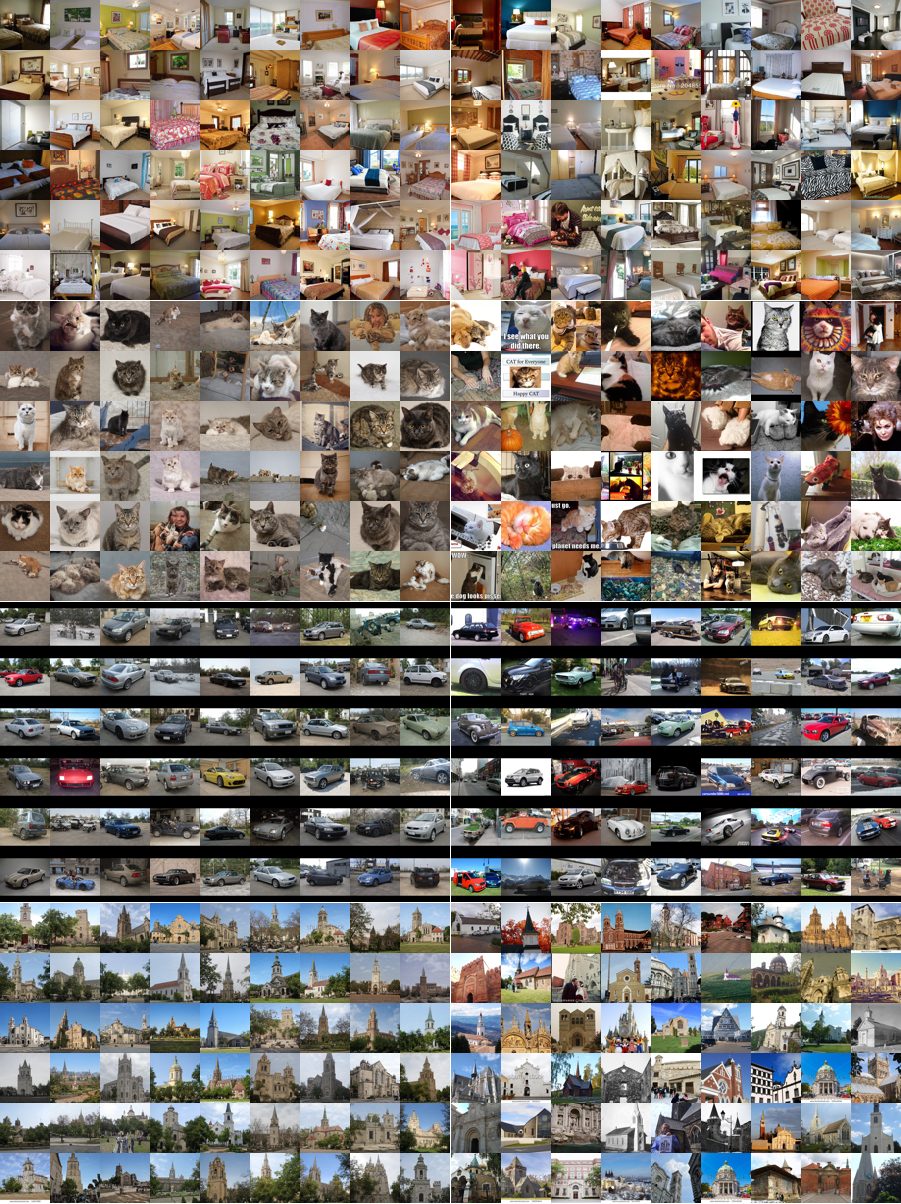

In [3]:
fake_list, real_list, fake_dir, real_dir = get_rand_imgs(
                                fake_dir='/home/jupyter/image_folder/stylegan1_bedrooms_30k', 
                                real_dir='/home/jupyter/image_folder/lsun_bedrooms', 
                                img_count=108
)

fake_ims, fake_fn, fake_sz = create_collage(450, 300, fake_dir, fake_list, cols=9, rows=6)
real_ims, real_fn, real_sz = create_collage(450, 300, real_dir, real_list, cols=9, rows=6)

offset = 1
new_im = Image.new('RGB', size=(fake_sz[0] + real_sz[0] + offset, 1204), color=(255,255,255,0))
new_im.paste(fake_ims, (0, 0))
new_im.paste(real_ims, (fake_sz[0] + offset, 0))

fake_sz = list(fake_sz)
real_sz = list(real_sz)
fake_sz[1] += offset
real_sz[1] += offset

fake_list, real_list, fake_dir, real_dir = get_rand_imgs(
                                fake_dir='/home/jupyter/image_folder/stylegan2_cats', 
                                real_dir='/home/jupyter/image_folder/lsun_cats', 
                                img_count=108
)

fake_ims, fake_fn, fake_size = create_collage(450, 300, fake_dir, fake_list, cols=9, rows=6)
real_ims, real_fn, real_size = create_collage(450, 300, real_dir, real_list, cols=9, rows=6)

new_im.paste(fake_ims, (0,                   fake_sz[1]))
new_im.paste(real_ims, (fake_sz[0] + offset, real_sz[1]))

fake_list, real_lis, fake_dir, real_dir = get_rand_imgs(
                                fake_dir='/home/jupyter/image_folder/stylegan2_cars', 
                                real_dir='/home/jupyter/image_folder/lsun_cars', 
                                img_count=108
)

fake_ims, fake_fn, fake_size = create_collage(450, 300, fake_dir, fake_list, cols=9, rows=6)
real_ims, real_fn, real_size = create_collage(450, 300, real_dir, real_list, cols=9, rows=6)

fake_sz[1] += (fake_size[1] + offset)
real_sz[1] += (real_size[1] + offset)

new_im.paste(fake_ims, (0,                   fake_sz[1]))
new_im.paste(real_ims, (fake_sz[0] + offset, real_sz[1]))

fake_list, real_list, fake_dir, real_dir = get_rand_imgs(
                                fake_dir='/home/jupyter/image_folder/stylegan2_churches', 
                                real_dir='/home/jupyter/image_folder/lsun_churches', 
                                img_count=108
)

fake_ims, fake_fn, fake_size = create_collage(450, 300, fake_dir, fake_list, cols=9, rows=6)
real_ims, real_fn, real_size = create_collage(450, 300, real_dir, real_list, cols=9, rows=6)

fake_sz[1] += (fake_size[1] + offset)
real_sz[1] += (real_size[1] + offset)

new_im.paste(fake_ims, (0,                   fake_sz[1]))
new_im.paste(real_ims, (fake_sz[0] + offset, real_sz[1]))

collage_fn = 'imgs/collage.jpg'
display(new_im)
new_im.save(collage_fn)

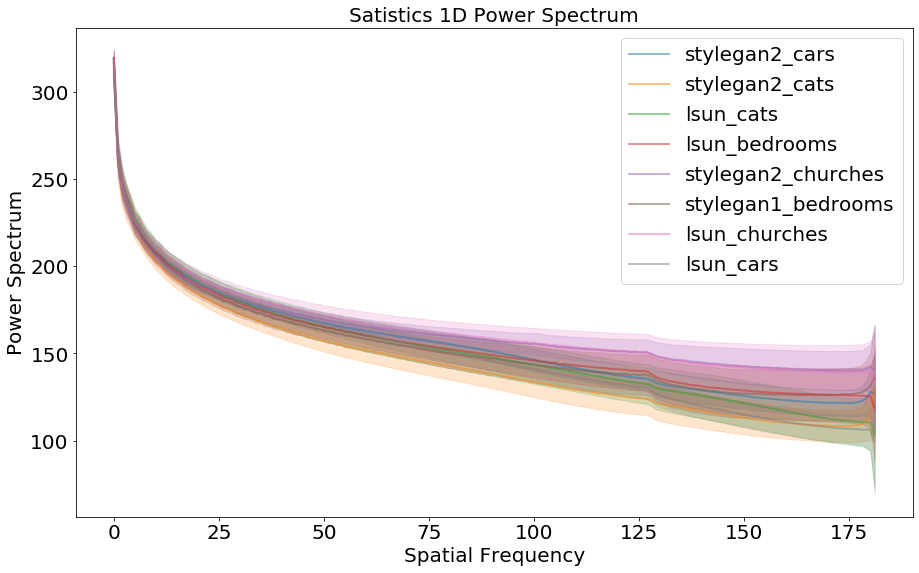

In [4]:
origin_dataset = {
    'lsun_bedrooms': 0, 
    'lsun_cars': 1, 
    'lsun_cats': 2, 
    'lsun_churches': 3, 
    'stylegan1_bedrooms': 4, 
    'stylegan2_cars': 5, 
    'stylegan2_cats': 6, 
    'stylegan2_churches': 7, 
    0: 'lsun_bedrooms', 
    1: 'lsun_cars', 
    2: 'lsun_cats', 
    3: 'lsun_churches', 
    4: 'stylegan1_bedrooms', 
    5: 'stylegan2_cars', 
    6: 'stylegan2_cats', 
    7: 'stylegan2_churches'
}
path = '/home/jupyter/CSE253_FinalProject/LSUN_BCCC_256.hdf5'

x, y, error, lbls, _ = create_mean_plot(path, origin_dataset, in_vector_sz=182)
show_mean_plot(
    x, 
    y, 
    error, 
    lbls, 
    save_fig_path='./imgs/mean_plot_bccc.jpg'
)

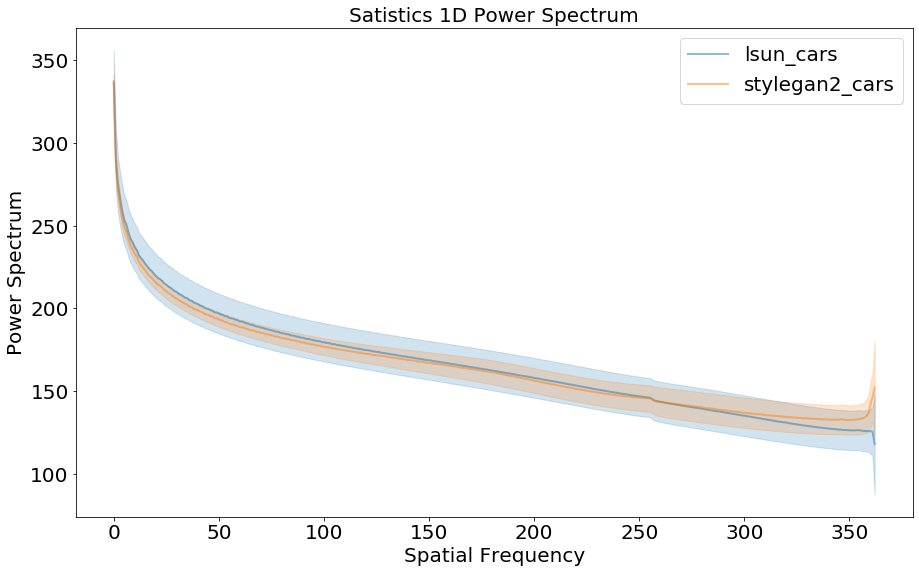

In [5]:
origin_dataset = {
    'lsun_cars': 0, 
    'stylegan2_cars': 1, 
    0: 'lsun_cars', 1: 
    'stylegan2_cars'
}
path = '/home/jupyter/CSE253_FinalProject/LSUN_Cars.hdf5'

x, y, error, lbls, _ = create_mean_plot(path, origin_dataset, in_vector_sz=363)
show_mean_plot(
    x, 
    y, 
    error, 
    lbls, 
    save_fig_path='./imgs/mean_plot_cars.jpg'
)

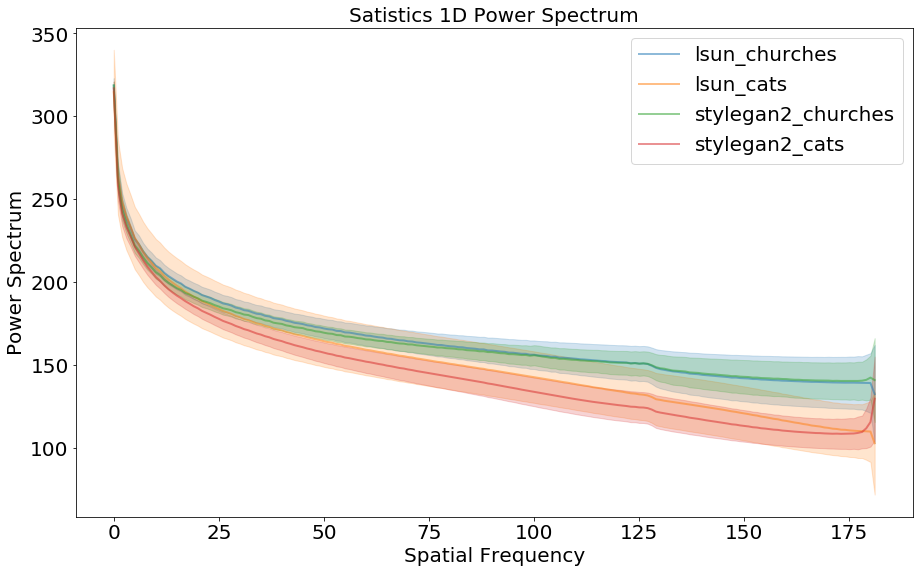

In [6]:
origin_dataset = {
    'lsun_cats': 0, 
    'lsun_churches': 1, 
    'stylegan2_cats': 2, 
    'stylegan2_churches': 3, 
    0: 'lsun_cats', 
    1: 'lsun_churches', 
    2: 'stylegan2_cats', 
    3: 'stylegan2_churches'
}
path = '/home/jupyter/CSE253_FinalProject/LSUN_256.hdf5'

x, y, error, lbls, _ = create_mean_plot(path, origin_dataset, in_vector_sz=182)
show_mean_plot(
    x, 
    y, 
    error, 
    lbls, 
    save_fig_path='./imgs/mean_plot_256.jpg'
)